In [10]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('./data/boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
print(f"The shape of the data is: {data.shape}")
print(f"The columns of the data are: {data.columns}")

The shape of the data is: (506, 14)
The columns of the data are: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
import seaborn as sns

<AxesSubplot:>

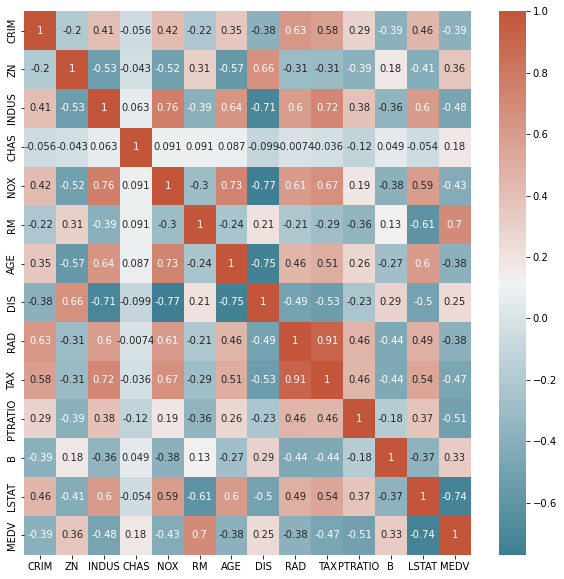

In [18]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [22]:
X = data.drop(['MEDV'], axis=1)
y = data['MEDV']

In [28]:
X.shape

(506, 13)

In [27]:
y.shape

(506,)

In [32]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [33]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [57]:
# Evaluate model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 17.710105218437285


In [34]:
lr.score(X_test, y_test)

0.6508417720329553

### ANNs

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


2024-03-03 20:07:03.420725: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-03 20:07:03.948148: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 20:07:03.948277: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 20:07:04.050503: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-03 20:07:04.434584: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-03 20:07:04.602533: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [50]:

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [51]:
# Create model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))



In [52]:

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')



In [54]:
# Train model
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: 580.7005
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 525.1572
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 456.2190
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 367.8185
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 263.3841
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 161.6644
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 96.8046
Epoch 8/100
12/12 [==============================] - 0s 5ms/step - loss: 70.7859
Epoch 9/100
12/12 [==============================] - 0s 5ms/step - loss: 54.9885
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 41.6485
Epoch 11/100
12/12 [==============================] - 0s 4ms/step - loss: 34.9469
Epoch 12/100
12/12 [==============================] - 0s 4ms/step - loss: 29.9372
Epoch 13/100
12/12 

In [58]:

# Evaluate model
loss = model.evaluate(X_test, y_test)
print('Test loss:', loss)

5/5 [==============================] - 0s 4ms/step - loss: 17.7101
Test loss: 17.710105895996094


In [59]:
from sklearn.metrics import mean_squared_error

# Assuming that y_test are your true labels and model is your trained model
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

5/5 [==============================] - 0s 9ms/step
Mean Squared Error: 17.710105218437285


In [65]:
# accuracy score of Sequential model
accuracy = model.evaluate(X_test, y_test)
print('Accuracy Score:', accuracy)


5/5 [==============================] - 0s 3ms/step - loss: 17.7101
Accuracy Score: 17.710105895996094
